In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
dfs = pd.read_excel("HW3Atrain.xlsx", sheet_name=None)
for key, value in dfs.items():
    arr=value.values
    
validate = pd.read_excel("HW3Avalidate.xlsx", sheet_name=None)
for key, value in validate.items():
    valid=value.values
plt.scatter(valid[:,0],valid[:,1],c=valid[:,2])
plt.plasma()
plt.show()

<Figure size 640x480 with 1 Axes>

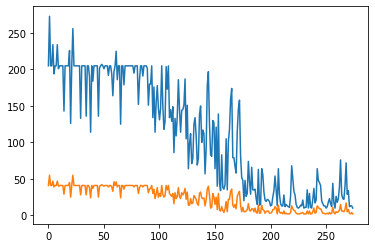

In [22]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def leaky_relu(x):
    return np.where(x > 0, x, 0.01*x)

def relu(x):
    return np.where(x > 0, x, 0)

def leaky_relu_derivative(x,alpha=0.01):
    return np.where(x>0,1,alpha)

def relu_derivative(x):
    return np.where(x>0,1,0)

def sigmoid_derivative(x):
    return x * (1.0 - x)

def softmax(A):
    e = np.exp(A - np.sum(A, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)

def softmax_derivative(xss):
    return np.array([[x*(np.sum(xs)-x)/np.square(np.sum(xs)) for x in xs] for xs in xss])

def mean_squared_error(out,y):
    sum=0
    for i in range(0,out.shape[0]):
        for j in range(0,out.shape[1]):
            sum+=np.square(out[i][j]-y[i][j])
    return sum/out.shape[0]

class NeuralNetwork:
    def __init__(self, x, y, h1, h2, sigma, learningrate, randomized):
        if randomized:
            self.bias1      = np.random.rand(h1)*sigma
            self.bias2      = np.random.rand(h2)*sigma
            self.bias3      = np.random.rand(1)*sigma
            self.weights1   = np.random.rand(2,h1)*sigma
            self.weights2   = np.random.rand(h1,h2)*sigma
            self.weights3   = np.random.rand(h2,1)*sigma
        else:
            self.bias1      = np.full((h1),1.0)
            self.bias2      = np.full((h2),1.0)
            self.bias3      = np.full((1),1.0)
            self.weights1   = np.array( [[-0.86255058, 0.01394296,  0.07748951, -0.06906529],
                                         [-0.3212758 ,  0.44293804, -0.44511852, -0.1747204 ]])
            self.weights2   = np.array([[-0.26709872 , 0.15668592],
                                         [-0.44228315, -0.17413574],
                                         [-0.20315842,  0.09110192],
                                         [-0.15251214,  0.07597694]])
            self.weights3   = np.array([[ 0.19692683],[-0.0338748 ]])

        self.output     = np.array([1])
        self.learningrate=learningrate
        
        
    # Update input and wanted output
    def update(self,x,y):
        self.input=x
        self.y=y

    # Implementation of the forward propagation
    def feedforward(self):
        self.layer1 = relu(np.dot(self.input, self.weights1)+self.bias1)
        self.layer2 = relu(np.dot(self.layer1, self.weights2)+self.bias2)
        self.output = relu(np.dot(self.layer2, self.weights3)+self.bias3)
        
    # Get the mean squared error of the last forward propagation that happened
    def getError(self):
        return mean_squared_error(self.output,self.y)
    
    # Get the number of points that are being classified correctly
    def getAbsoluteError(self,x,y):
        self.update(x,y)
        self.feedforward()
        correct=0
        for i in range(0,self.output.size):
            if(round(self.output[i][0])==y[i]):
                correct+=1
        return correct
    
    def getLoss(self,x,y):
        self.update(x,y)
        self.feedforward()
        return self.getError()
    
    def getResult(self):
        return self.output
        
    # Function which prints the confusion matrix values
    def printConfusion(self,x,y):
        self.update(x,y)
        self.feedforward()
        correct0=0
        correct1=0
        wrong0=0
        wrong1=0
        
        for i in range(0,self.output.size):
            if(round(self.output[i][0])==y[i]):
                if(y[i]==1.0):
                    correct1+=1
                else:
                    correct0+=1
            else:
                if(y[i]==1.0):
                    wrong1+=1
                else:
                    wrong0+=1
                    
        print('correct1')
        print(correct1)
        print('correct0')
        print(correct0)
        print('wrong1')
        print(wrong1)
        print('wrong0')
        print(wrong0)
        
    # Implementation of backward propagation
    def backprop(self):
        
        delta3=np.array(2*(self.output-np.asmatrix(self.y)))*relu_derivative(self.output)
        d_weights3 = self.layer2.T.dot(delta3)
        
        delta2=(delta3.dot(self.weights3.T))*(relu_derivative(self.layer2))
        d_weights2 = self.layer1.T.dot(delta2)
        
        delta1=(delta2.dot(self.weights2.T))*(relu_derivative(self.layer1))
        d_weights1 = self.input.T.dot(delta1)
        
        self.weights1 -= d_weights1*self.learningrate
        self.weights2 -= d_weights2*self.learningrate
        self.weights3 -= d_weights3*self.learningrate
        
dfs = pd.read_excel("HW3Atrain.xlsx", sheet_name=None)
for key, value in dfs.items():
    arr=value.values

# normalize values to roughly (0,1) so the weights don't need to have crazy values
normalized=arr/10000

for i in range(0,normalized.shape[0]):
    if normalized[i][2]>0.0:
        normalized[i][2]=1.0
        
validNormalized=valid/10000

for i in range(0,validNormalized.shape[0]):
    if validNormalized[i][2]>0.0:
        validNormalized[i][2]=1.0
        
nn=NeuralNetwork(x,y,4,2,0.4,0.01,False)

e=[]

batchsize=10

#print(normalized)
f=[]
g=[]
stop=False
epochs=100
for i in range(0,epochs):
    if stop:
        break
    np.random.shuffle(normalized)
    batches=np.array_split(normalized, batchsize)
    for batch in batches:
        if stop:
            break
        x=batch[:,(0,1)]
        y=np.array([[0.0] if val==0 else [1.0] for val in batch[:,2]])
        nn.update(x,y)
        nn.feedforward()
        nn.backprop()
        #e.append(nn.getError())
        loss=nn.getLoss(normalized[:,(0,1)],np.array([normalized[:,2]]).T)
#         f.append(loss)
        if loss < 0.05:
            stop=True
        f.append(normalized.shape[0]-nn.getAbsoluteError(normalized[:,(0,1)],normalized[:,2]))
#         g.append(nn.getLoss(validNormalized[:,(0,1)],np.array([validNormalized[:,2]]).T))
        g.append(validNormalized.shape[0]-nn.getAbsoluteError(validNormalized[:,(0,1)],validNormalized[:,2]))

    
# For testing different learning rates and sigmas:
    
# for sigma_ in range(0,11):
#     for lr in range(-4,1):
#         lr_=pow(10,lr)
#         nn=NeuralNetwork(x,y,4,2,sigma_/10,lr_,True)

#         e=[]

#         batchsize=10

#         #print(normalized)
#         f=[]
#         g=[]
#         stop=False
#         for i in range(0,100):
#             if stop:
#                 break
#             np.random.shuffle(normalized)
#             batches=np.array_split(normalized, batchsize)
#             for batch in batches:
#                 if stop:
#                     break
#                 x=batch[:,(0,1)]
#                 y=np.array([[0.0] if val==0 else [1.0] for val in batch[:,2]])
#                 nn.update(x,y)
#                 nn.feedforward()
#                 nn.backprop()
#                 #e.append(nn.getError())
#                 loss=nn.getLoss(normalized[:,(0,1)],np.array([normalized[:,2]]).T)
#                 f.append(loss)
#                 if loss < 0.05:
#                     stop=True
#                 #f.append(normalized.shape[0]-nn.getAbsoluteError(normalized[:,(0,1)],normalized[:,2]))
#                 #g.append(nn.getLoss(validNormalized[:,(0,1)],np.array([validNormalized[:,2]]).T))
#                 #g.append(validNormalized.shape[0]-nn.getAbsoluteError(validNormalized[:,(0,1)],validNormalized[:,2]))
                
#         plt.plot(f)
#         plt.show()
#         print('accuracy for sigma='+str(sigma_/10)+', LR='+str(lr_))
#         print(str(nn.getAbsoluteError(validNormalized[:,(0,1)],validNormalized[:,2]))+'/82 correct')

        
        
        
        
# x=arr[:,(0,1)]
# y=np.array([[0.0] if val==0 else [1.0] for val in arr[:,2]])
# nn.update(x,y)
# nn.feedforward()

# nn.printConfusion(validNormalized[:,(0,1)],np.array([validNormalized[:,2]]).T)
# print(nn.getAbsoluteError(normalized[:,(0,1)],normalized[:,2]))
# print('orange one')


plt.plot(f)
plt.plot(g)

    

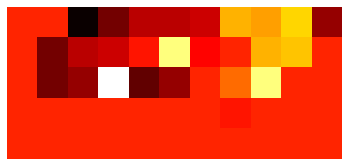

In [16]:
a = np.array([[41,41,25,31,35,35,36,49,48,51,33],
            [41,31,35,36,40,58,39,41,49,50,41],
            [41,31,33,63,30,33,41,45,58,41,41],
            [41,41,41,41,41,41,41,40,41,41,41],
            [41,41,41,41,41,41,41,41,41,41,41]])
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.axis('off')
plt.show()